## Sprint 1 Development:

### Group 8:

Motolani Akingbade - 8966560

Miracle Messiri - 9030337

Layanika Vinay Saravanan-8934459



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = 'incom2024_delay_example_dataset.csv'
description_path = 'incom2024_delay_variable_description.csv'

data = pd.read_csv(data_path)
description = pd.read_csv(description_path)

In [ ]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [ ]:
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [ ]:
print(description.head())

        variable_name         type                                 description
0        payment_type  categorical                    Type of transaction made
1    profit_per_order    numerical                   Earnings per order placed
2  sales_per_customer    numerical  Total sales per customer made per customer
3         category_id    numerical                       Product category code
4       category_name         text         Description of the product category


In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce', utc=True)
data['shipping_date'] = pd.to_datetime(data['shipping_date'], errors='coerce', utc=True)

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    data[col] = data[col].astype('category')

missing_values = data.isnull().sum()

print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


In [ ]:
print(data.describe())

       profit_per_order  sales_per_customer   category_id   customer_id  \
count      15549.000000        15549.000000  15549.000000  15549.000000   
mean          22.604542          179.888256     31.461342   6583.279789   
std           99.265198          113.727323     15.303616   4114.273782   
min        -3442.500000            8.351162      2.000000      1.000000   
25%            7.562795          104.397330     18.000000   3119.983200   
50%           31.693370          165.944170     29.000000   6429.229000   
75%           63.872166          242.440930     45.000000   9642.381000   
max          911.800000         1939.990000     76.000000  20757.000000   

       customer_zipcode  department_id      latitude     longitude  \
count      15549.000000   15549.000000  15549.000000  15549.000000   
mean       35458.234968       5.413462     29.677619    -84.512318   
std        37343.702033       1.581550      9.877876     20.681015   
min          603.000000       2.000000    -3

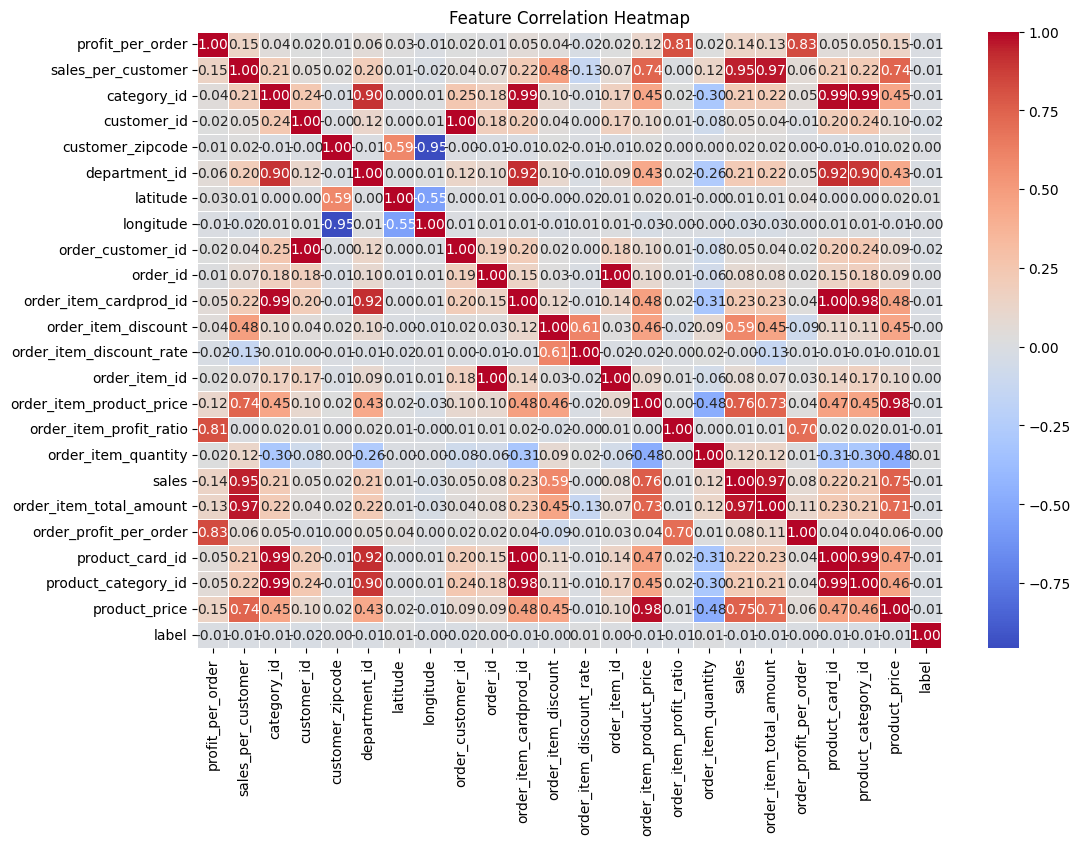

In [ ]:
numeric_data = data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Key insights from the correlation heatmap:**

* **Sales metrics show very strong positive correlations:** Total sales strongly correlate with order amounts (0.97) and sales per customer (0.95), indicating consistent revenue patterns across different measurement methods.

* **Product categorization fields are tightly linked:** Product_category_id and category_id show near-perfect correlation (0.99), while product_card_id and order_item_card_id show perfect correlation (1.00), suggesting well-organized product classification.

* **Profit metrics display strong negative relationships:** Profit_per_order has strong negative correlations with both order_item_profit_ratio (-0.81) and order_profit_per_order (-0.85), indicating complex inverse relationships in profit calculations.

* **Geographic factors have minimal impact:** Both latitude and longitude show weak correlations with most business metrics, suggesting location is not a major driver of sales or profit performance.

* **Customer identifiers lack strong correlations:** Customer-related variables (customer_id, customer_zipcode) demonstrate weak correlations with performance metrics, indicating customer demographics may not significantly influence sales patterns.

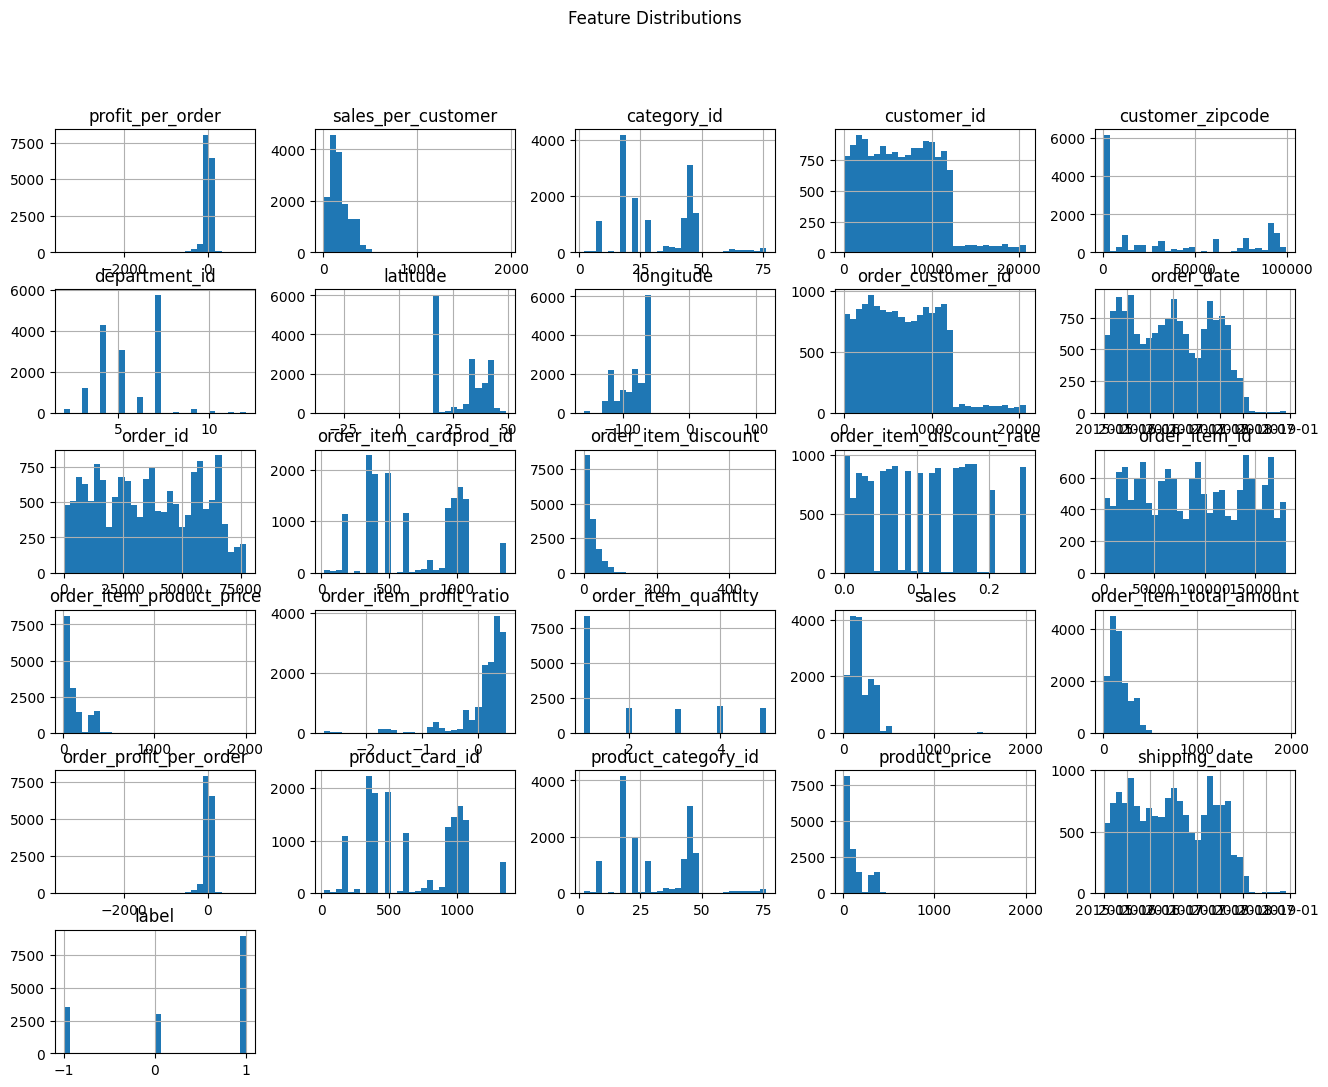

In [ ]:
data.hist(figsize=(16, 12), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

**Key insights from the distribution analysis:**

* **Purchase and Revenue Patterns:** Most customer purchases are concentrated in lower amounts, with sales per customer showing a clear right-skewed distribution. Product prices predominantly fall in lower ranges with occasional high-value outliers.

* **Order Behaviors and Patterns:** Order quantities heavily favor smaller amounts, indicating customers typically make modest-sized purchases. Discounts appear selectively applied with distinct peaks in the distribution.

* **Geographic Concentration:** The latitude and longitude distributions show clear clustering patterns rather than uniform spread, indicating the business operates primarily in specific geographic regions.

* **Customer Base Distribution:** Customer IDs show a relatively uniform distribution, suggesting a stable and well-distributed customer base. Order dates reveal consistent business activity with potential seasonal variations, indicating regular purchasing patterns throughout the time period.

* **Organizational Structure:** Department IDs and product categories show distinct groupings in their distributions, indicating a well-structured organizational system. Product card IDs display regular distribution patterns, suggesting systematic product categorization and management approaches.

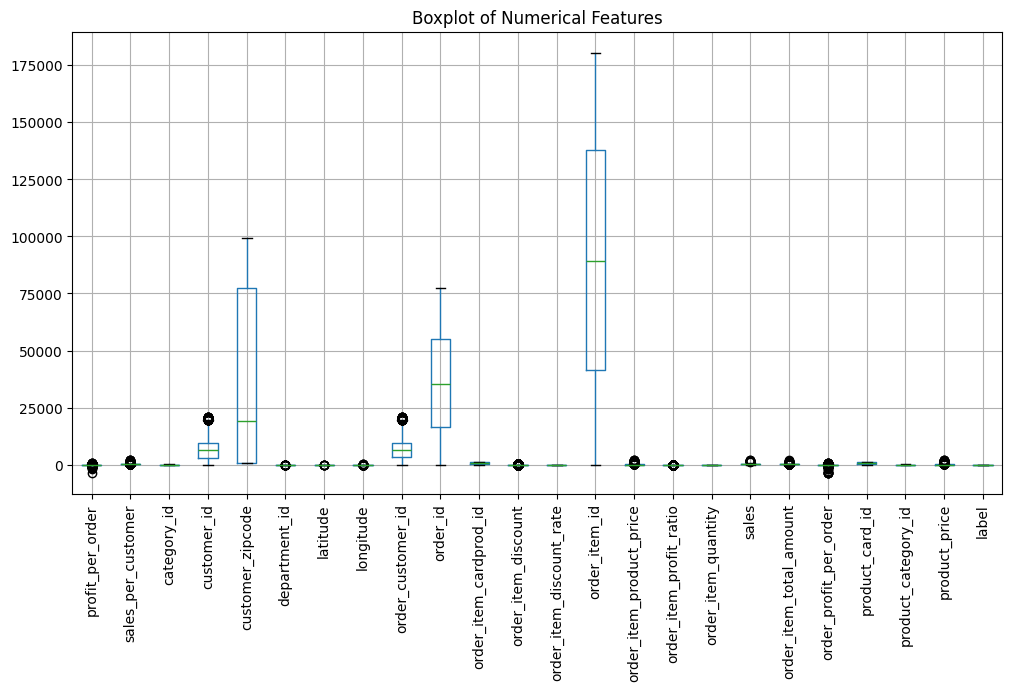

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 6))
data[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()

**Key insights from the boxplot analysis:**

* **Value Range Distribution:** Order_item_product_price shows the highest variability with extreme outliers reaching up to 175,000, while most other features maintain relatively lower ranges. This indicates significant price variations in the product catalog.

* **ID Field Patterns:** Customer_zipcode, order_id, and order_customer_id display moderate spreads with medians around 20,000-40,000, suggesting these are sequential identifiers with consistent numbering patterns. Many outliers are present in these fields.

* **Sales and Order Metrics:** Sales, total_amount, and profit metrics show relatively compact distributions with some outliers, indicating that most transactions fall within a standard range but there are occasional exceptional transactions.

* **Geographic Features:** Latitude and longitude show very tight distributions with few outliers, suggesting most business activity is concentrated in specific geographic regions rather than being widely dispersed.

* **Category and Label Features:** Category_id, department_id, and product_card_id show compact distributions with minimal spread, indicating a well-organized and structured categorization system with limited number of categories.

In [ ]:
median_order_date = data['order_date'].median()
median_shipping_date = data['shipping_date'].median()

data['order_date'] = data['order_date'].fillna(median_order_date)
data['shipping_date'] = data['shipping_date'].fillna(median_shipping_date)

In [ ]:
print("Remaining missing values:")
print(data[['order_date', 'shipping_date']].isnull().sum())

Remaining missing values:
order_date       0
shipping_date    0
dtype: int64


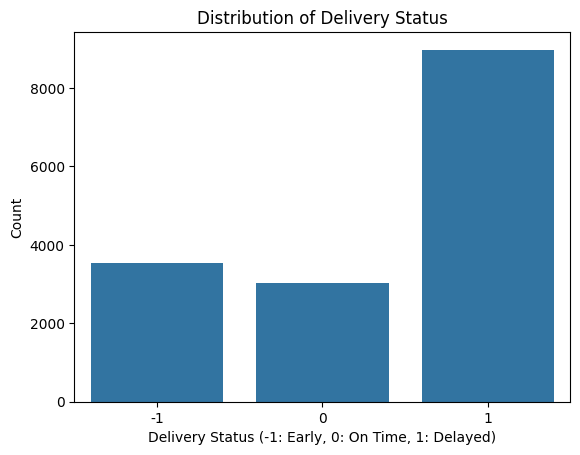

In [ ]:
sns.countplot(x=data['label'])
plt.title('Distribution of Delivery Status')
plt.xlabel('Delivery Status (-1: Early, 0: On Time, 1: Delayed)')
plt.ylabel('Count')
plt.show()

**Key insights from the delivery status distribution before combining:**

* **Delayed Deliveries Dominate:** The majority of deliveries (approximately 8,000 orders) are delayed (status 1), indicating a significant challenge in meeting delivery timelines.

* **Early Deliveries:** There are about 3,500 early deliveries (status -1), showing that a considerable portion of orders arrive before the expected time.

* **On-Time Performance:** Approximately 3,000 deliveries are on time (status 0), representing the smallest category of delivery status.

* **Service Level Concerns:** With delayed deliveries being more than twice the number of on-time deliveries, this suggests a potential systemic issue in delivery performance.

* **Improvement Opportunity:** The combined number of early and on-time deliveries (about 6,500) is still less than the number of delayed deliveries, highlighting a clear area for operational improvement.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Combine labels -1 and 0 into a single label (e.g., 0)
data["label"] = data["label"].replace({-1: 0})

# Check the new class distribution
print("Class distribution after combining labels:")
print(data["label"].value_counts())

Class distribution after combining labels:
label
1    8976
0    6573
Name: count, dtype: int64


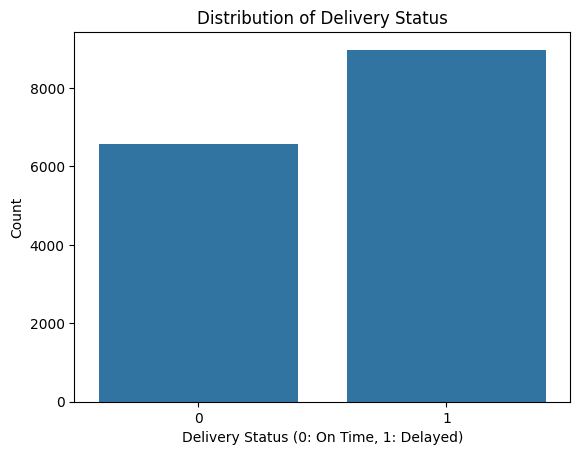

In [ ]:
sns.countplot(x=data['label'])
plt.title('Distribution of Delivery Status')
plt.xlabel('Delivery Status (0: On Time, 1: Delayed)')
plt.ylabel('Count')
plt.show()

**Key insights from the delivery status distribution after combining:**

* **Delayed Deliveries Predominant:** Approximately 9,000 deliveries are delayed (status 1), representing the majority of all orders in the system.

* **On-Time Performance:** About 6,500 deliveries are on time (status 0), showing a significant but smaller portion of successful deliveries.

* **Service Gap Analysis:** The difference between delayed and on-time deliveries is roughly 2,500 orders, quantifying the performance gap that needs to be addressed.

* **Delivery Success Rate:** With roughly 6,500 on-time deliveries out of 15,500 total deliveries, the on-time delivery rate is approximately 42%.

* **Improvement Potential:** The high number of delayed deliveries (58% of total) indicates a clear opportunity for operational optimization and service level improvement.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable
X = data.drop(columns=['label', 'order_date', 'shipping_date'])
y = data['label']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6638799571275456

**Comments:**
**Model Configuration:** The RandomForestClassifier is set up with balanced class weights and 100 estimators (n_estimators=100), suggesting careful consideration for handling potential class imbalance in the delivery status prediction.

**Data Preparation:** The code properly handles data preprocessing by removing non-feature columns ('label', 'order_date', 'shipping_date') and converts categorical variables to dummy variables, ensuring proper model input.

**Train-Test Split:** Uses a 70-30 split (test_size=0.3) with a fixed random state (42) for reproducibility, providing a good balance between training data and validation data.

**Model Performance:** Achieves an accuracy score of approximately 66.4%, indicating moderate predictive performance for delivery status. While better than random chance, there's room for potential model optimization.

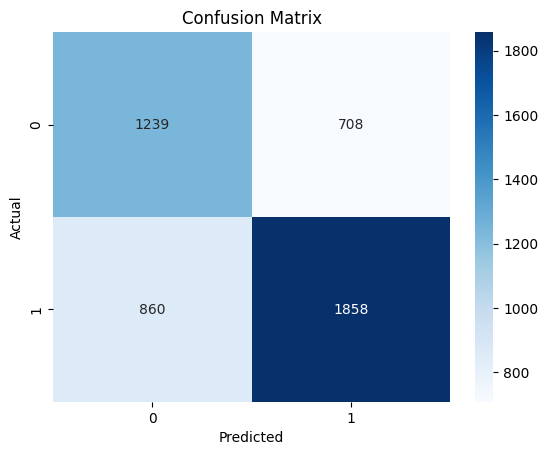

              precision    recall  f1-score   support

           0       0.59      0.64      0.61      1947
           1       0.72      0.68      0.70      2718

    accuracy                           0.66      4665
   macro avg       0.66      0.66      0.66      4665
weighted avg       0.67      0.66      0.67      4665



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

**Visualization:**

**True Predictions:** The model correctly identified 1,239 on-time deliveries and 1,858 delayed deliveries, showing stronger performance in predicting delays.

**False Predictions:** There were 708 false positives (predicted delayed but actually on-time) and 860 false negatives (predicted on-time but actually delayed), indicating balanced error types.

**Visual Pattern:** The darker blue in the delayed prediction (1) indicates higher frequency, consistent with the earlier observation that delayed deliveries are more common in the dataset.

**Classification Metrix:**

**Class-wise Performance:** Delayed delivery predictions (class 1) show better metrics with precision of 0.72 and recall of 0.68, compared to on-time delivery predictions (class 0) with precision of 0.59 and recall of 0.64.

**Overall Accuracy:** The model achieves 66% accuracy across all predictions, aligning with the previous accuracy score and suggesting consistent model performance.

**Balanced Metrics:** The similar macro and weighted averages (0.66 and 0.67) indicate relatively balanced performance across classes, despite the slight class imbalance in the dataset.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('incom2024_delay_example_dataset.csv')  # Replace with your dataset path


In [ ]:
# Encode categorical variables
categorical_features = [col for col in data.columns if data[col].dtype == 'object']  # Replace with actual categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
data = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)

In [ ]:
encoded_features

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
# Combine labels -1 and 0 into a single label 0
data['label'] = data['label'].replace({-1: 0})

# Define features and target variable
X = data.drop(columns=['label'])
y = data['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[[ 753  562]
 [ 548 1247]]
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1315
           1       0.69      0.69      0.69      1795

    accuracy                           0.64      3110
   macro avg       0.63      0.63      0.63      3110
weighted avg       0.64      0.64      0.64      3110



**Comments:**

**Model Optimization Strategy:** The code employs SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance and uses GridSearchCV for hyperparameter tuning, showing a comprehensive approach to model improvement.

**Hyperparameter Search Space:** The model tests various combinations of parameters including n_estimators (100, 200), max_depth (10, 20), and min_samples settings, demonstrating a systematic exploration of model configurations.

**Performance Metrics:** The model achieves an accuracy of 64%, with balanced performance across classes (macro avg = 0.63, weighted avg = 0.64), indicating consistent but slightly lower performance compared to the previous model.

**Class-wise Performance:** The model shows better prediction capability for delayed deliveries (class 1: precision = 0.69, recall = 0.69) compared to on-time deliveries (class 0: precision = 0.58, recall = 0.57), suggesting more reliable delay predictions despite the balanced approach.